In [10]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
from functools import partial

# Define maximum number of iterations
MAX_ITER = 100

# Define range of complex numbers
RE_START = -2
RE_END = 1
IM_START = -1
IM_END = 1

# Compute Mandelbrot set as f_c(z) = z^2 + c while z is in 
# range [-2, 2] and n below the maximum number of iterations
def mandelbrot(c, max_iter):
    z = n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

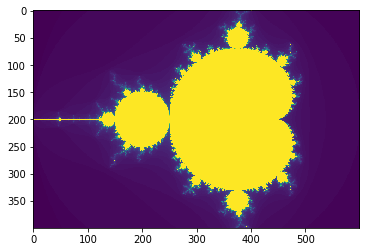

In [4]:
# Compute number of iterations possible in Mandelbrot calculation for 
# complex numbers in range [RE_START + IM_START * i, RE_END + IM_END * i]
image = np.zeros((400, 600))
for x, y in np.ndindex(image.shape):
    c = complex(RE_START + (y / image.shape[1]) * (RE_END - RE_START),
                    IM_START + (x / image.shape[0]) * (IM_END - IM_START))
    image[x,y] = mandelbrot(c, 100)
    
plt.imshow(image)
plt.show()

In [5]:
# Take s Monte Carlo samples from the Mandelbrot set
def monte_carlo_integration(i, s):
    re = np.random.uniform(RE_START, RE_END, s)
    im = np.random.uniform(IM_START, IM_END, s)
    n = np.vectorize(mandelbrot)(re + 1j * im, i)
    return (n == i).sum() / s * abs(RE_START - RE_END) * abs(IM_START - IM_END)

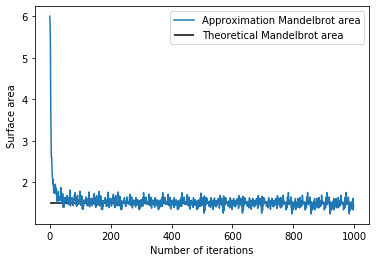

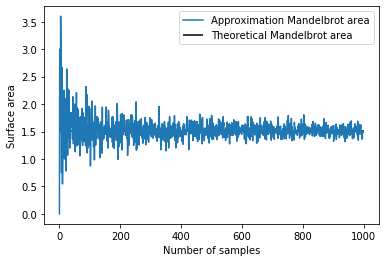

In [8]:
samples = 1000
areas = []
iterations = 1000

pool = mp.Pool(mp.cpu_count())

areas = list(pool.starmap(monte_carlo_integration, zip(range(1, iterations), [samples]*(iterations-1))))
# for i in range(1, iterations):
#     area = monte_carlo_integration(i, samples)
#     areas.append(area)
plt.plot(areas, label = "Approximation Mandelbrot area")
plt.hlines(1.506484, 0, iterations, label = "Theoretical Mandelbrot area")
plt.xlabel("Number of iterations")
plt.ylabel("Surface area")
plt.legend()
plt.show()

areas = list(pool.starmap(monte_carlo_integration, zip([iterations]*(samples-1), range(1, samples))))
# for s in range(1, samples):
#     area = monte_carlo_integration(iterations, s)
#     areas.append(area)
plt.plot(areas, label = "Approximation Mandelbrot area")
plt.hlines(1.506484, 0, samples, label = "Theoretical Mandelbrot area")
plt.xlabel("Number of samples")
plt.ylabel("Surface area")
plt.legend()
plt.show()

pool.close()